🧩 **Problem Statement:**

Efficient irrigation is critical for sustainable agriculture, especially in regions facing water scarcity. Farmers often rely on intuition or fixed schedules, leading to over- or under-irrigation. This project aims to build an intelligent irrigation scheduling system using machine learning to optimize water usage based on real-time environmental conditions and crop growth stage.

In [ ]:
# Install libraries (if not already present in Colab)
!pip install seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
print("Executed")

Executed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets - datasets.csv')  # Replace with your actual filename




In [ ]:
df.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [ ]:
df.head(10)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
5,Wheat,6,800,21,29,0
6,Wheat,5,500,33,26,0
7,Wheat,8,350,21,28,0
8,Wheat,11,123,17,45,0
9,Wheat,12,543,25,53,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CropType      501 non-null    object
 1   CropDays      501 non-null    int64 
 2   SoilMoisture  501 non-null    int64 
 3   temperature   501 non-null    int64 
 4   Humidity      501 non-null    int64 
 5   Irrigation    501 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,64.053892,411.391218,24.682635,39.381238,0.393214
std,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,20.000000,19.000000,0.000000
50%,57.000000,369.000000,24.000000,32.000000,0.000000
75%,90.000000,554.000000,28.000000,65.000000,1.000000
max,210.000000,990.000000,263.000000,85.000000,1.000000


In [ ]:
df.isnull().sum()

,0
CropType,0
CropDays,0
SoilMoisture,0
temperature,0
Humidity,0
Irrigation,0


**SUPERVISED LEARNING:**

Supervised learning is used to predict outcomes based on labeled data. In this project, it helps determine whether irrigation is needed (0 or 1) based on features like cropdays, soil moisture, temperature, and humidity. This is a classification problem where the model learns from past examples. We use a Random Forest Classifier to train on the dataset and make predictions. The model is evaluated using a confusion matrix and classification report. These metrics show how accurately the system can support smart irrigation decisions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Define features and target
X = df[['CropDays', 'SoilMoisture', 'temperature', 'Humidity']]
y = df['Irrigation']  # 0 = No irrigation, 1 = Irrigation needed

In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[53 12]
 [ 2 34]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88        65
           1       0.74      0.94      0.83        36

    accuracy                           0.86       101
   macro avg       0.85      0.88      0.86       101
weighted avg       0.88      0.86      0.86       101



**UNSUPERVISED LEARNING:**

   In this project, clustering techniques help group similar crop and environmental conditions based on features like cropdays, soilmoisture, temperature, and humidity. By identifying clusters of similar data points, farmers can better understand different crop growth environments and irrigation needs without prior knowledge of irrigation labels. This insight can support customized irrigation strategies for each cluster, improving water efficiency.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Select features (exclude irrigation since unsupervised)
X = df[['CropDays', 'SoilMoisture', 'temperature', 'Humidity']]

In [ ]:
# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#Find optimal number of clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

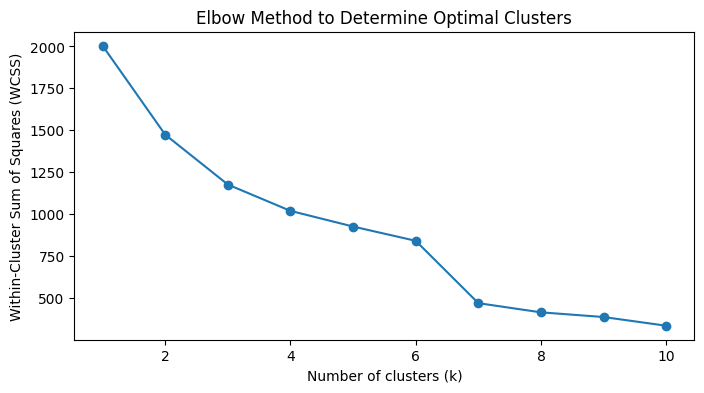

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# From the elbow plot, choose number of clusters, e.g. k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
# Add cluster labels to original dataframe
df['Cluster'] = clusters

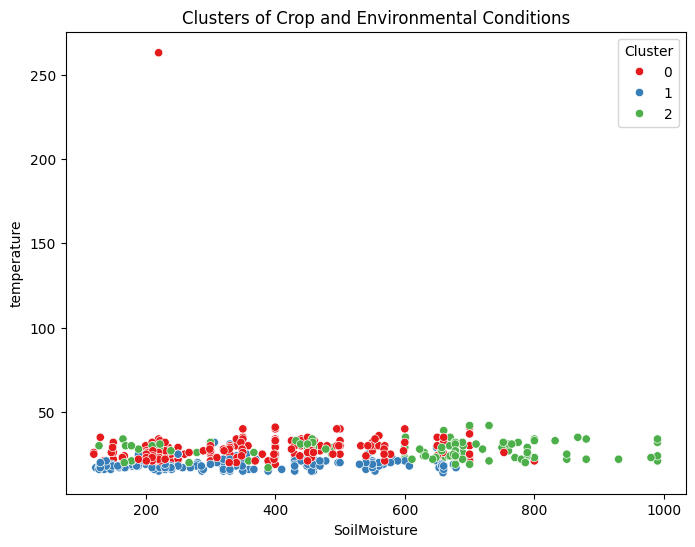

In [ ]:
# Visualize clusters (using first two features)
plt.figure(figsize=(8,6))
sns.scatterplot(x='SoilMoisture', y='temperature', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Crop and Environmental Conditions')
plt.show()

**Explanation:**

We use K-Means clustering to group the data points into clusters based on environmental and crop features.

The Elbow Method helps determine the best number of clusters.

Clusters reveal groups of similar conditions, which can guide customized irrigation plans.

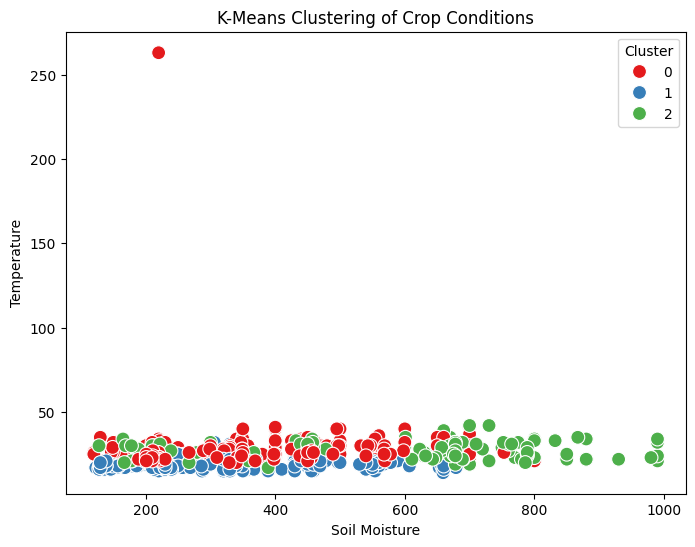

In [ ]:
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='SoilMoisture', y='temperature', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering of Crop Conditions')
plt.xlabel('Soil Moisture')
plt.ylabel('Temperature')
plt.legend(title='Cluster')
plt.show()

THE ABOVE CODE:

   Clusters data into 3 groups based on soil moisture and temperature.

Visualizes each point colored by cluster membership.

Helps to see natural groupings of environmental conditions for crops.

**REINFORCEMENT LEARNING:**

  Reinforcement Learning (RL) is a machine learning technique where an agent learns to make decisions by interacting with an environment to maximize cumulative rewards. In this project, RL can be used to develop an intelligent irrigation scheduler that learns the best irrigation actions based on current crop and environmental conditions (cropdays, soilmoisture, temperature, humidity). The agent receives feedback (reward) based on water usage efficiency and crop health, learning over time to optimize irrigation schedules that conserve water while maintaining crop growth.

In [ ]:
# Define states based on soil moisture (simplified)
states = ['dry', 'optimal', 'wet']
actions = ['irrigate', 'do_nothing']


In [ ]:
# Q-table initialization
q_table = np.zeros((len(states), len(actions)))

In [ ]:
# Parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.2  # Exploration rate


In [ ]:
# Simulated environment function
def step(state, action):
    # Rewards based on action and state
    if state == 0:  # dry
        reward = 10 if action == 0 else -10
        next_state = 1 if action == 0 else 0
    elif state == 1:  # optimal moisture
        reward = 5 if action == 1 else -5
        next_state = 1 if action == 1 else 2
    else:  # wet
        reward = -10 if action == 0 else 0
        next_state = 2
    return next_state, reward

In [ ]:
# Training loop
for episode in range(1000):
    state = np.random.choice([0,1,2])  # Random initial state

    for _ in range(10):  # 10 steps per episode
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice([0,1])
        else:
            action = np.argmax(q_table[state])

        next_state, reward = step(state, action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state

In [ ]:
print("Learned Q-Table:")
print(q_table)

Learned Q-Table:
[[ 55.          38.02824948]
 [ -5.          50.        ]
 [-10.           0.        ]]


**Explanation:**

States represent soil moisture levels: dry, optimal, wet.

Actions: irrigate or do nothing.

The agent learns a policy to maximize reward, balancing irrigation and water saving.

Over episodes, the Q-table values improve to guide better irrigation decisions.



**LINEAR REGRESSION:**

Linear Regression is used to predict a continuous numeric value based on one or more input features. In your case, it can be used to predict values like soil moisture or irrigation water amount based on cropdays, temperature, humidity, etc.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Define input features (X) and target variable (y)
X = df[['CropDays', 'temperature', 'Humidity']]
y = df['SoilMoisture']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39574.10491172117
R² Score: 0.1207199713149183


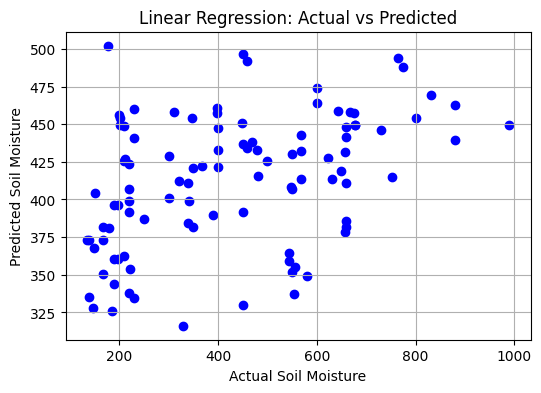

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

**📊Histogram of a Feature (e.g., Soil Moisture)**

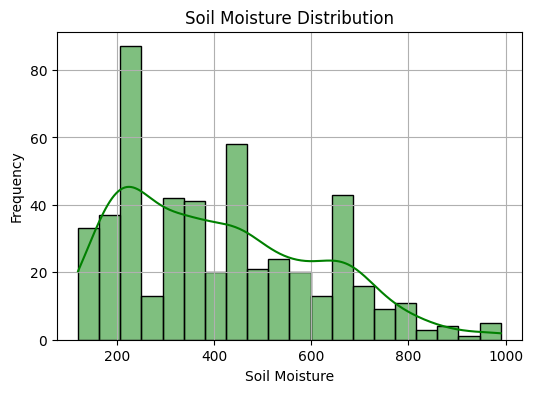

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of soil moisture
plt.figure(figsize=(6, 4))
sns.histplot(df['SoilMoisture'], bins=20, kde=True, color='green')
plt.title("Soil Moisture Distribution")
plt.xlabel("Soil Moisture")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


📉Residual Plot (Actual - Predicted)




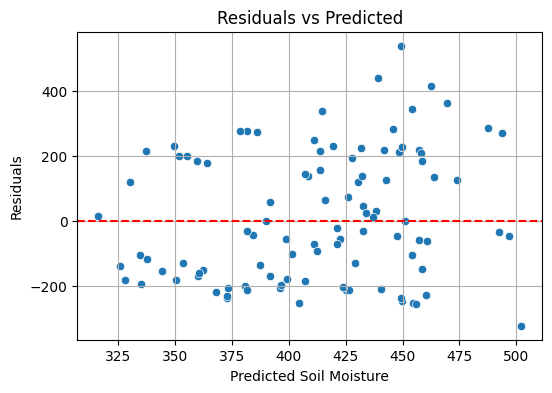

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Soil Moisture")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


**📈 Line Plot: Predictions vs Actual**





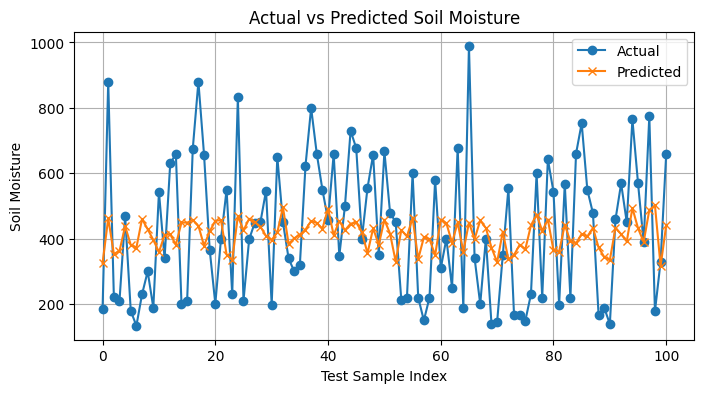

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Soil Moisture")
plt.xlabel("Test Sample Index")
plt.ylabel("Soil Moisture")
plt.legend()
plt.grid(True)
plt.show()


📌**Correlation Heatmap (Optional for Insight)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: If your dataset has a 'CropType' column with values like 'Wheat', 'Rice', etc.
le = LabelEncoder()
df['CropType'] = le.fit_transform(df['CropType'])


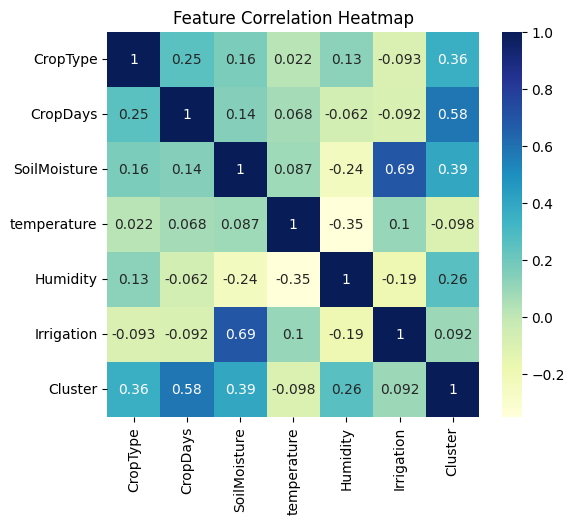

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()
